In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Load dataset
df = pd.read_csv('loan_train.csv')



In [256]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [257]:
df.shape

(614, 12)

## Data Preprocessing Part

In [258]:
#Check the number of unique value on object datatype
df.select_dtypes(include='object').nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Area             3
Status           2
dtype: int64

In [259]:
df.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

## Exploratory Data Analysis

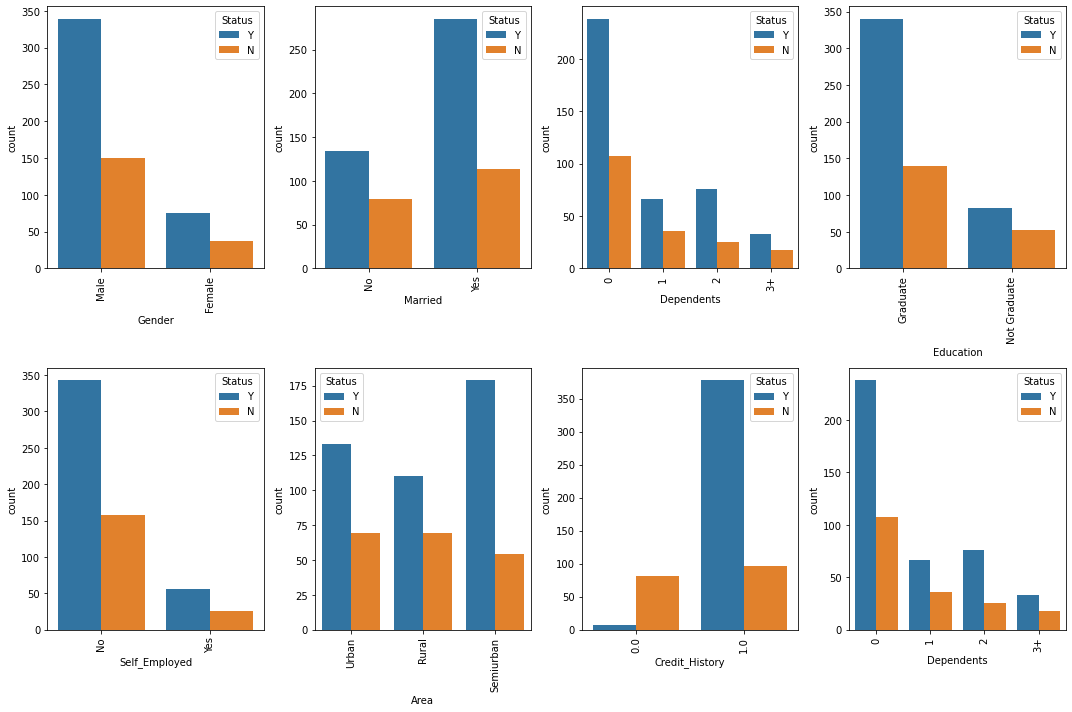

In [260]:
# list of categorical variables to plot
cat_vars = ['Gender', 'Married', 'Dependents', 'Education', 
            'Self_Employed', 'Area', 'Credit_History', 'Dependents']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Status', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

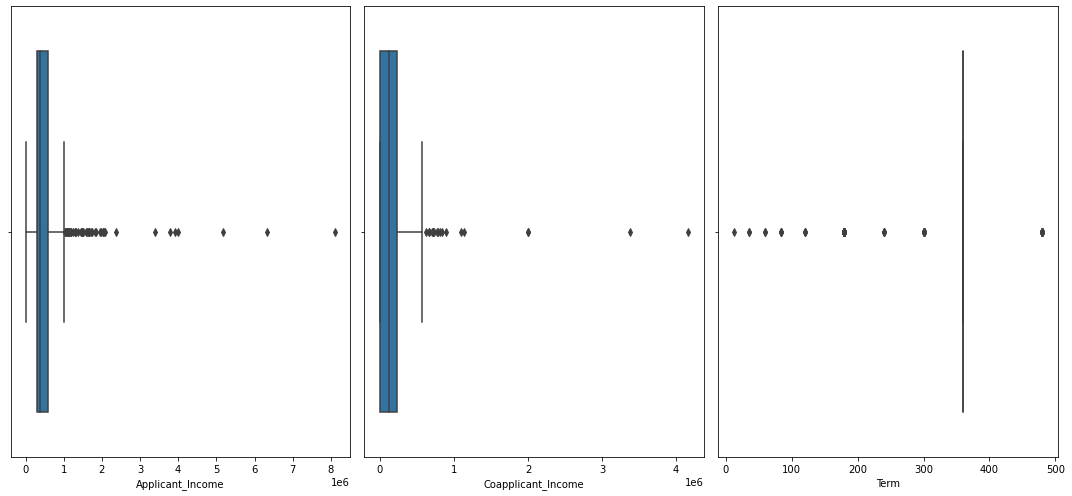

In [261]:
num_vars = ['Applicant_Income', 'Coapplicant_Income', 'Term']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

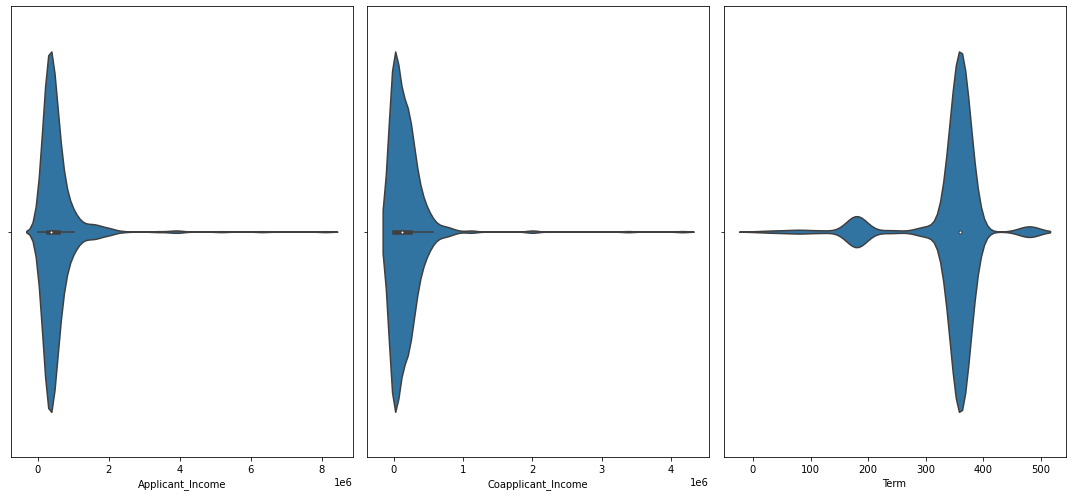

In [262]:
num_vars = ['Applicant_Income', 'Coapplicant_Income', 'Term']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
# axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()

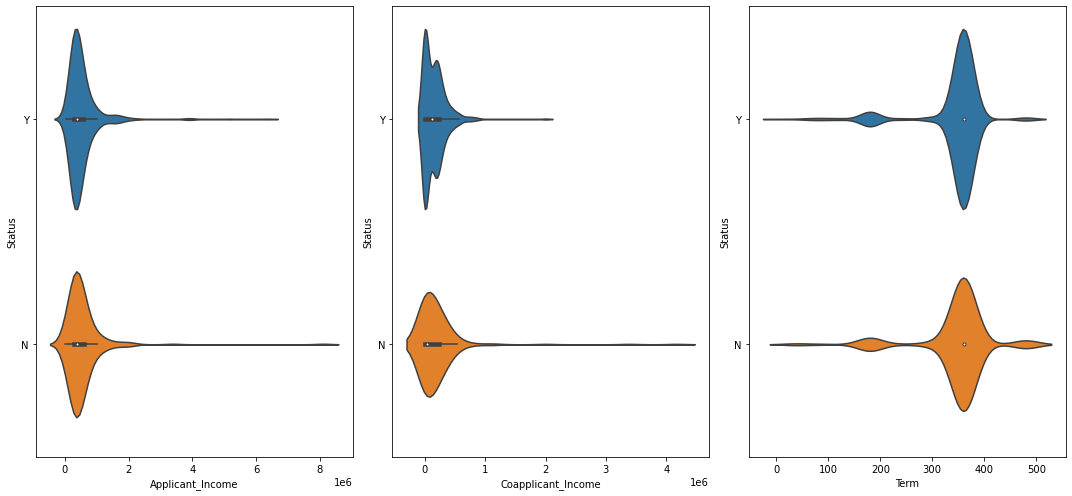

In [263]:
num_vars = ['Applicant_Income', 'Coapplicant_Income', 'Term']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, y='Status', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

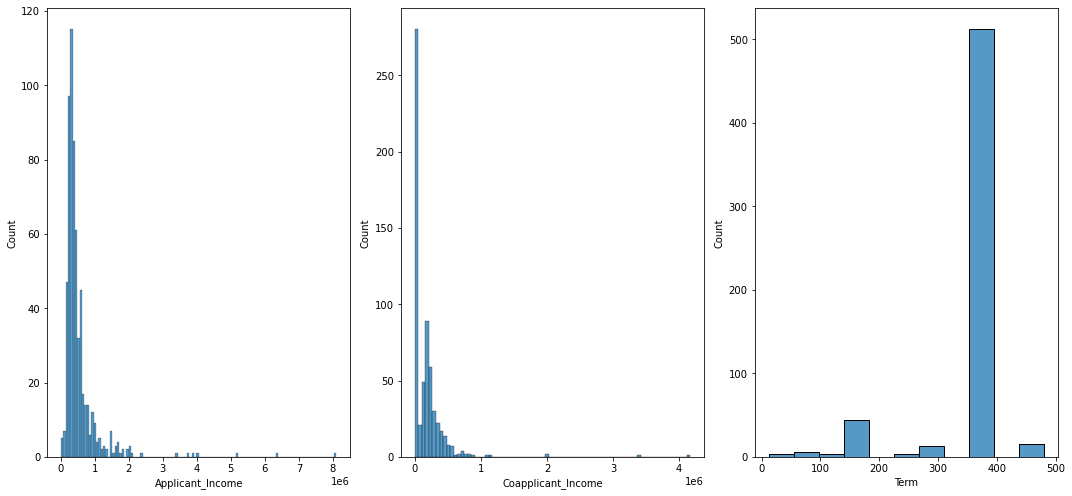

In [264]:
num_vars = ['Applicant_Income', 'Coapplicant_Income', 'Term']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

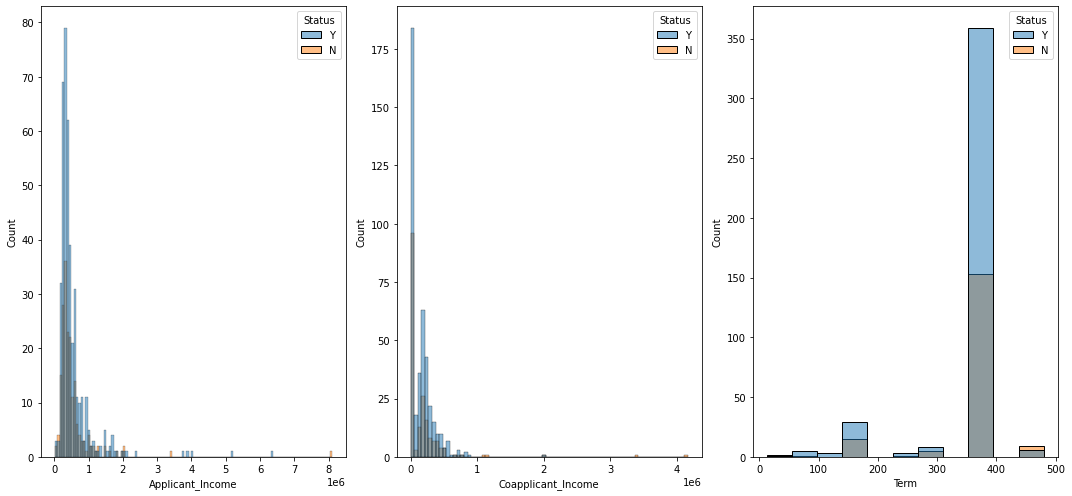

In [265]:
num_vars = ['Applicant_Income', 'Coapplicant_Income', 'Term']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, hue='Status', ax=axs[i])

fig.tight_layout()

plt.show()

## Data Processing Part 2

In [266]:
check_missing = df.isnull().sum()
check_missing[check_missing > 0].sort_values(ascending=False)

Credit_History    50
Self_Employed     32
Dependents        15
Term              14
Gender            13
Married            3
dtype: int64

In [267]:
# Fill null values with 'Unknown'
df.fillna('Unknown', inplace=True)

#Check the missing value again
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [268]:
df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                   object
Credit_History         object
Area                   object
Status                 object
dtype: object

## Label Encoding For object datatypes

In [269]:
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female' 'Unknown']
Married: ['No' 'Yes' 'Unknown']
Dependents: ['0' '1' '2' '3+' 'Unknown']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' 'Unknown']
Term: [360.0 120.0 240.0 'Unknown' 180.0 60.0 300.0 480.0 36.0 84.0 12.0]
Credit_History: [1.0 0.0 'Unknown']
Area: ['Urban' 'Rural' 'Semiurban']
Status: ['Y' 'N']


In [270]:
df[['Term', 'Credit_History']] = df[['Term', 'Credit_History']].astype(str)

In [271]:
df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                   object
Credit_History         object
Area                   object
Status                 object
dtype: object

In [272]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    


In [273]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,6,1,2,1
1,1,2,1,0,0,458300,150800.0,12800000,6,1,0,0
2,1,2,0,0,2,300000,0.0,6600000,6,1,2,1
3,1,2,0,1,0,258300,235800.0,12000000,6,1,2,1
4,1,0,0,0,0,600000,0.0,14100000,6,1,2,1


## Balancing the dataset

1    422
0    192
Name: Status, dtype: int64

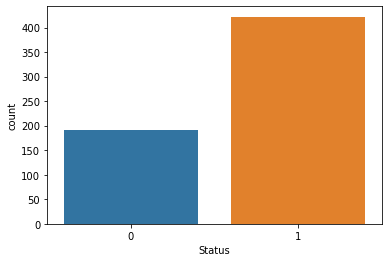

In [274]:
sns.countplot(df['Status'])
df['Status'].value_counts()

In [275]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['Status']==1)] 
df_minority = df[(df['Status']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 422, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

0    422
1    422
Name: Status, dtype: int64

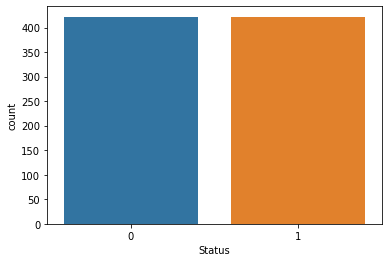

In [276]:
sns.countplot(df_upsampled['Status'])
df_upsampled['Status'].value_counts()

## Removing outliers using QTR method

In [277]:
# specify the columns to remove outliers from dataframe
column_names = ['Applicant_Income', 'Coapplicant_Income', 'Term']

# remove outliers for each selected column using the IQR method
for column_name in column_names:
    Q1 = df_upsampled[column_name].quantile(0.25)
    Q3 = df_upsampled[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df_delete = df_upsampled[((df_upsampled[column_name] < (Q1 - 1.5 * IQR)) | (df_upsampled[column_name] > (Q3 + 1.5 * IQR)))]
    df_upsampled = df_upsampled[~((df_upsampled[column_name] < (Q1 - 1.5 * IQR)) | (df_upsampled[column_name] > (Q3 + 1.5 * IQR)))]

df_upsampled.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
148,0,0,0,0,0,1000000,166600.0,22500000,6,1,0,0
338,0,0,3,1,0,183000,0.0,0,6,0,2,0
24,1,2,1,0,1,371700,292500.0,15100000,6,2,1,0
57,1,2,0,0,0,336600,220000.0,13500000,6,1,0,0
107,1,0,0,1,1,733300,0.0,12000000,6,1,0,0


In [278]:
df_delete

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
554,1,2,0,0,0,359300,426600.0,13200000,2,0,0,0
378,1,0,0,0,0,306900,0.0,7100000,7,1,2,0
202,1,2,3,1,0,399200,0.0,0,2,1,2,0
179,1,0,0,1,0,233300,145100.0,10200000,7,0,2,0
241,1,2,1,1,0,251000,198300.0,14000000,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0,2,1,0,0,460800,284500.0,14000000,2,1,1,1
575,1,2,2,0,0,315900,46100.0,10800000,9,1,2,1
590,1,2,0,0,0,300000,341600.0,5600000,2,1,1,1
593,1,2,0,0,0,385900,330000.0,14200000,2,1,0,1


In [279]:
df_upsampled['Applicant_Income'].quantile(0.25)- 1.5 * IQR

279000.0

In [280]:
df_upsampled['Applicant_Income'].quantile(0.75)+ 1.5 * IQR

511600.0

In [281]:
df_upsampled['Coapplicant_Income'].quantile(0.25)- 1.5 * IQR

0.0

In [282]:
df_upsampled['Coapplicant_Income'].quantile(0.75)+ 1.5 * IQR

221975.0

In [283]:
df_upsampled['Term'].quantile(0.25)- 1.5 * IQR

6.0

In [284]:
df_upsampled['Term'].quantile(0.75)+ 1.5 * IQR

6.0

1    326
0    288
Name: Status, dtype: int64

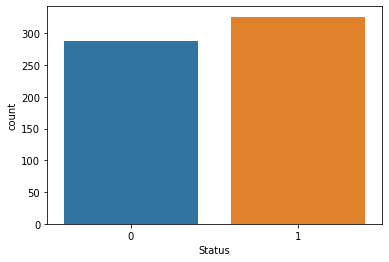

In [285]:
sns.countplot(df_upsampled['Status'])
df_upsampled['Status'].value_counts()

In [286]:
#Check the shape after outlier removal
df_upsampled.shape

(614, 12)

<AxesSubplot:>

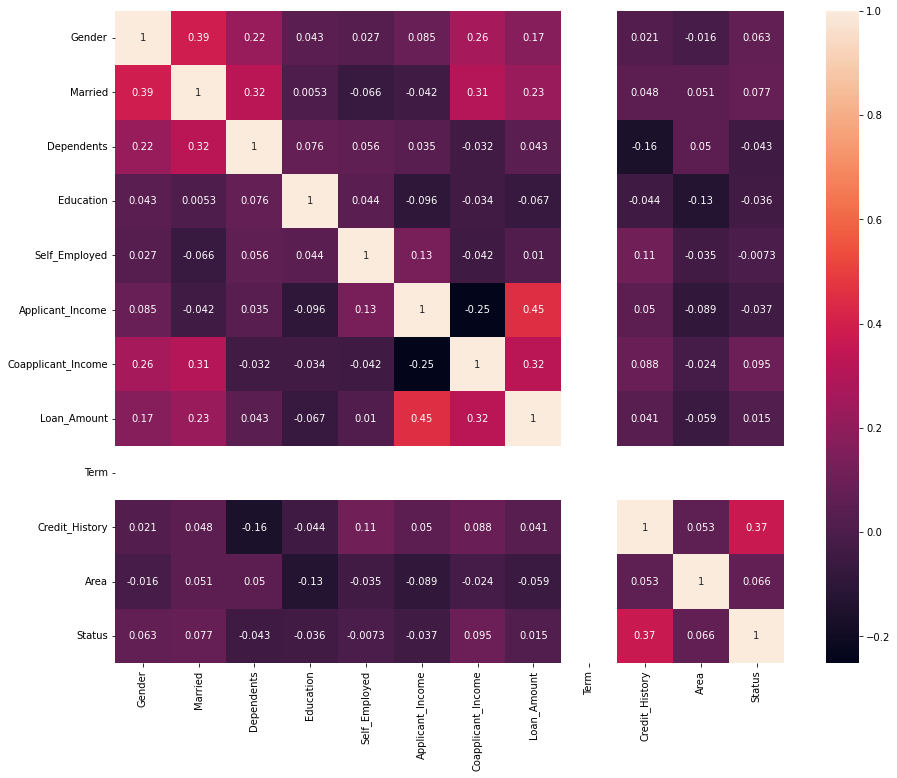

In [287]:
plt.figure(figsize=(15,12))
sns.heatmap(df_upsampled.corr(), fmt='.2g', annot=True)

In [288]:

df_upsampled.drop(columns='Term', inplace=True)

In [289]:
df_upsampled.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History,Area,Status
148,0,0,0,0,0,1000000,166600.0,22500000,1,0,0
338,0,0,3,1,0,183000,0.0,0,0,2,0
24,1,2,1,0,1,371700,292500.0,15100000,2,1,0
57,1,2,0,0,0,336600,220000.0,13500000,1,0,0
107,1,0,0,1,1,733300,0.0,12000000,1,0,0


In [290]:
# Define K-fold cross-validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize decision tree classifier
dtc = DecisionTreeClassifier(max_depth=len(df_upsampled.columns) * 10)

# Define parameter grid for grid search
param_grid = {'criterion': ['gini', 'entropy']}

In [292]:
# Initialize lists for storing accuracies
gini_acc = []
entropy_acc = []

# Iterate over the 5 folds
for train_idx, test_idx in skf.split(df_upsampled, df_upsampled['Status']):
    # Split data into training and testing sets
    X_train, y_train = df_upsampled.iloc[train_idx, :-1], df_upsampled.iloc[train_idx, -1]
    X_test, y_test = df_upsampled.iloc[test_idx, :-1], df_upsampled.iloc[test_idx, -1]

    # Perform grid search with 4-fold cross-validation
    gs = GridSearchCV(dtc, param_grid, cv=4)
    gs.fit(X_train, y_train)

    # Evaluate performance on testing set
    y_pred = gs.predict(X_test)
    gini_acc.append(accuracy_score(y_test, y_pred))

    # Perform grid search with 4-fold cross-validation
    gs = GridSearchCV(dtc, param_grid, cv=4, scoring='accuracy')
    gs.fit(X_train, y_train)

    # Evaluate performance on testing set
    y_pred = gs.predict(X_test)
    entropy_acc.append(accuracy_score(y_test, y_pred))

# Compute overall accuracies for Gini and Entropy
gini_acc_mean = sum(gini_acc) / k
entropy_acc_mean = sum(entropy_acc) / k

# Print the results
print('Mean accuracy for Gini:', gini_acc_mean)
print('Mean accuracy for Entropy:', entropy_acc_mean)
print('The best parameter is', 'Gini' if gini_acc_mean > entropy_acc_mean else 'Entropy')

Mean accuracy for Gini: 0.8615753698520592
Mean accuracy for Entropy: 0.8550846328135412
The best parameter is Gini
